## Excercise 1: Tiling the image

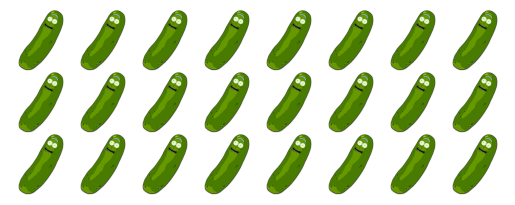

In [32]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

def load_and_tile_image(input_path, output_path, vertical_repeats=3, horizontal_repeats=8):
    """Load an image, create a tiled pattern, display and save the tiled image."""
    
    # Load the image
    image = Image.open(input_path)
    np_image = np.array(image)

    # Get the size of the original image
    img_height, img_width, _ = np_image.shape

    # Create tiled image using numpy's repeat function
    tiled_image = np.tile(np_image, (vertical_repeats, horizontal_repeats, 1))

    # Display the tiled image
    plt.imshow(tiled_image)
    plt.axis('off')
    plt.show()

    # Save the image
    output_image = Image.fromarray(tiled_image)
    output_image.save(output_path)

# Paths for input and output
loc_input = os.path.join('data', 'input', "pickle_rick.png")
loc_output = os.path.join('data', 'output', 'tiled_pickle_rick.png')

# Function call
load_and_tile_image(loc_input, loc_output)


## Excercise 2: Tiling and mirroring

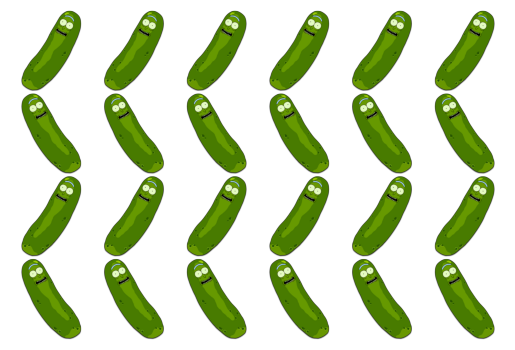

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
image = Image.open(loc_input)
np_image = np.array(image)

# Define the output path
loc_output = os.path.join('data', 'output', 'tiled_pickle_rick_mirrored.png')


def create_tiled_mirrored_image(image_array, vertical_repeats=4, horizontal_repeats=6, output_path=None):
    """
    Create a tiled and mirrored image from the given image array.

    Parameters:
    image_array (numpy.ndarray): Source image array.
    vertical_repeats (int): Number of times the image is repeated vertically.
    horizontal_repeats (int): Number of times the image is repeated horizontally.
    output_path (str): Path to save the tiled image. If None, the image is not saved.
    """
    # Get the size of the original image
    img_height, img_width, _ = image_array.shape

    # Initialize a new array to hold the tiled image
    tiled_height = img_height * vertical_repeats
    tiled_width = img_width * horizontal_repeats
    tiled_image = np.zeros((tiled_height, tiled_width, image_array.shape[2]), dtype=image_array.dtype)

    # Replicate and mirror the image
    for i in range(vertical_repeats): 
        for j in range(horizontal_repeats):
            vertical_start = i * img_height
            vertical_end = vertical_start + img_height
            horizontal_start = j * img_width
            horizontal_end = horizontal_start + img_width

            # Alternate mirroring for every other vertical repeat
            if i % 2 == 0:
                tile = image_array
            else:
                tile = image_array[:, ::-1]

            tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = tile

    # Display the tiled image
    plt.imshow(tiled_image)
    plt.axis('off')
    plt.show()

    # Save the tiled image if an output path is provided
    if output_path:
        output_image = Image.fromarray(tiled_image)
        output_image.save(output_path)

# Create and display the tiled mirrored image
create_tiled_mirrored_image(np_image, output_path=loc_output)


## Excercise 3: Creating a tiled mosaic

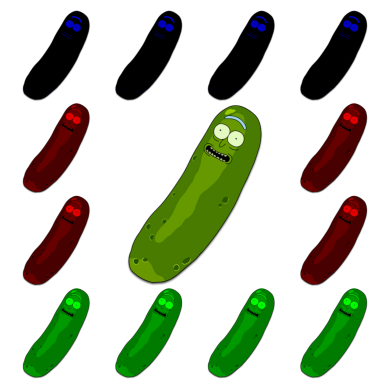

In [34]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

def create_tiled_mosaic(location, replication_factor, color):
    """
    Create a tiled image from the original, altering color in each tile.
    
    Parameters:
    location (str): File path of the original image.
    replication_factor (tuple): Vertical and horizontal replication factors.
    color (int): Color channel to be highlighted.

    Returns:
    numpy.ndarray: Tiled and color-altered image array.
    """
    image = Image.open(location)
    np_image = np.array(image)

    # Calculate tiled image dimensions
    img_height, img_width, _ = np_image.shape
    tiled_height = img_height * replication_factor[0]
    tiled_width = img_width * replication_factor[1]

    # Initialize tiled image array
    tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

    # Create and place altered image tiles
    for i in range(replication_factor[0]):
        for j in range(replication_factor[1]):
            altered_image = alter_color(image, color)
            vertical_slice = slice(i * img_height, (i + 1) * img_height)
            horizontal_slice = slice(j * img_width, (j + 1) * img_width)
            tiled_image[vertical_slice, horizontal_slice] = np.array(altered_image)

    return tiled_image

def alter_color(image, color):
    """
    Alter the color intensity of an image.

    Parameters:
    image (PIL.Image): Source image.
    color (int): Color channel to be highlighted.

    Returns:
    PIL.Image: Color-altered image.
    """
    img = image.convert("RGBA")
    width, height = img.size

    for x in range(width):
        for y in range(height):
            r, g, b, a = img.getpixel((x, y))
            altered_color = [(r, 0, 0, a), (0, g, 0, a), (0, 0, b, a)][color]
            img.putpixel((x, y), altered_color)
    return img

def append_arrays(a, b, direction):
    """
    Append two numpy arrays in specified direction.

    Parameters:
    a, b (numpy.ndarray): Arrays to be concatenated.
    direction (str): Direction of concatenation ('horizontal' or 'vertical').

    Returns:
    numpy.ndarray: Concatenated array.
    """
    axis = 1 if direction == "horizontal" else 0
    return np.concatenate((a, b), axis=axis)

def create_art(location):
    """
    Create an artistic representation by combining different color-altered tiles.

    Parameters:
    location (str): File path of the original image.

    Returns:
    numpy.ndarray: Artistic representation.
    """
    # Create tiled images with different color alterations
    vtop = create_tiled_mosaic(location, (1, 4), 2)
    hside = create_tiled_mosaic(location, (2, 1), 0)
    vbottom = create_tiled_mosaic(location, (1, 4), 1)
    center = Image.open(location)
    center = np.array(center).repeat(2, axis=1)
    double_sized = center.repeat(2, axis=0)

    # Combine the images to create the final art piece
    new_image = append_arrays(double_sized, hside, "horizontal")
    new_image = append_arrays(hside, new_image, "horizontal")
    new_image = append_arrays(new_image, vbottom, "vertical")
    new_image = append_arrays(vtop, new_image, "vertical")

    output_image = Image.fromarray(new_image)
    output_image.save(os.path.join("data", "output", 'pickle_rick_mosaic.png'))

    return new_image

# Specify the image location and create the art
loc_input = os.path.join('data', 'input', "pickle_rick.png")
pickle_art = create_art(loc_input)

# Display the art
plt.imshow(pickle_art)
plt.axis('off')
plt.show()


## Excercise 4: Creating a Warhol

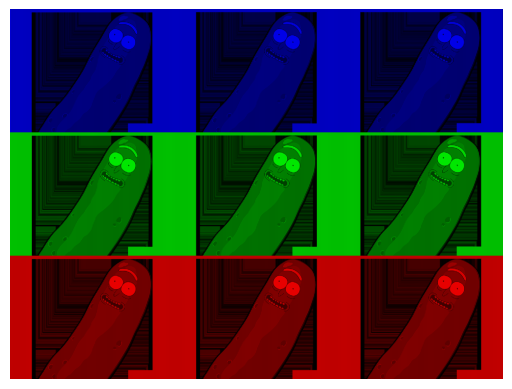

In [35]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Load an image from a given path and convert it to a numpy array.

    Parameters:
    image_path (str): The file path to the image.

    Returns:
    numpy.ndarray: Array representation of the loaded image.
    """
    image = Image.open(image_path)
    return np.array(image)

def alter_color(image, color):
    """
    Alter the color of the given image by retaining only one color channel.

    Parameters:
    image (numpy.ndarray): The original image array.
    color (int): The color channel to retain (0 for red, 1 for green, 2 for blue).

    Returns:
    numpy.ndarray: The color-altered image array.
    """
    img = Image.fromarray(image.astype('uint8'), 'RGB')

    for x in range(img.width):
        for y in range(img.height):
            r, g, b = img.getpixel((x, y))
            altered_pixel = [(r, 0, 0), (0, g, 0), (0, 0, b)][color]
            img.putpixel((x, y), altered_pixel)

    return np.array(img)

def stack_and_display(images):
    """
    Stack a list of images vertically, display the stacked image, and return it.

    Parameters:
    images (list of numpy.ndarray): A list of image arrays to be stacked.

    Returns:
    numpy.ndarray: The vertically stacked image array.
    """
    stacked_image = np.vstack(images)
    plt.imshow(stacked_image)
    plt.axis('off')
    plt.show()
    return stacked_image

# Load and process the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
np_image = load_image(loc_input)

# Create horizontally stacked image (replicated 4 times)
h_stack = np.tile(np_image, (4, 1))

# Create color-altered images
altered_blue = alter_color(h_stack, 2)
altered_green = alter_color(h_stack, 1)
altered_red = alter_color(h_stack, 0)

# Stack and display the altered images
tiled_image = stack_and_display([altered_blue, altered_green, altered_red])

# Save the image
loc_output = os.path.join('data', 'output', 'pickle_rick_warhol.png')
output_image = Image.fromarray(tiled_image)
output_image.save(loc_output)


## Excercise 5: Adding pixels and alternate color on pixel level

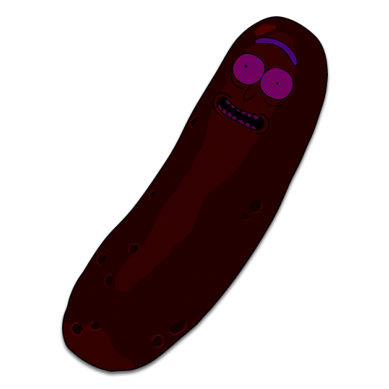

In [36]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def alter_pixels(image_path):
    """
    Alternate pixel colors in the image by modifying the red and blue channels.

    Parameters:
    image_path (str): Path to the image file.

    Returns:
    PIL.Image: The altered image.
    """
    with Image.open(image_path) as img:
        img = img.convert("RGBA")
        width, height = img.size

        for x in range(width):
            for y in range(height):
                pixel = img.getpixel((x, y))
                r, g, b, a = pixel

                # Alternate the pixel color alteration
                if (x + y) % 2 == 0:
                    new_pixel = (r, 0, 0, a)  # Red channel only
                else:
                    new_pixel = (0, 0, b, a)  # Blue channel only

                img.putpixel((x, y), new_pixel)

        return img

# Specify the image location
loc_input = os.path.join('data', 'input', 'pickle_rick.png')

# Call the function to alter the image
altered_img = alter_pixels(loc_input)

# Save the altered image
output_path = os.path.join('data', 'output', 'pickle_rick_altered_RGB.png')
altered_img.save(output_path)

# Display the altered image
plt.imshow(altered_img)
plt.axis('off')  # Hide the axis for a cleaner view
plt.show()
